In [1]:
import glob
import numpy as np
from astropy.io import fits
import pandas as pd
from astropy.stats import LombScargle

In [2]:
def massAAPreader(ID, campaign):
    
    try:

        #lcfile=glob.glob('../../GO*/*'+target.split('/')[-1].split('_')[0][4:]+'*k2sc.lc');
        lcfile=glob.glob('../../GO*/ktwo'+str(ID)+'-c'+campaign+'_lpd-targ.fits_massAAP_lc_TH8_k2sc.lc')[0]

       # if len(lcfile)==0:
       #     massAAP_k2sc_corr_flux = massAAP(each,True)
       #     lcfile=glob.glob('../../GO*/*'+target.split('/')[-1].split('_')[0][4:]+'*k2sc.lc')

        #print(lcfile)
        lc=np.genfromtxt(lcfile,delimiter=' ',skip_header=1)
        massAAPreader.lc=lc
        bjd=lc[:,0]
        flux=lc[:,1]

        
        return bjd, flux
    
    except IndexError:
        
        return False, False

In [3]:
def k2sffreader(ID, campaign):
    
    try:

        k2sfffile = 'K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_'+str(ID)+'-c'+campaign+'_kepler_v1_llc.fits'
        print(k2sfffile)
        
      #  if 'c102' in target:
      #      k2sfffile ='hlsp_k2sff_k2_lightcurve_'+target.split('/')[-1][4:19]+'kepler_v1_llc.fits'
      #  else:
      #      k2sfffile ='hlsp_k2sff_k2_lightcurve_'+target.split('/')[-1][4:18]+'kepler_v1_llc.fits'

  #      hdul = fits.open('K2SFF_LCs_from_MAST_via_file_upload_form/'+k2sfffile)
         
  #      data=hdul[1].data
    
        data = fits.getdata(k2sfffile, ext=1)
        
#        k2sff_time=hdul[1].data['T']
#        k2sff_fcor=hdul[1].data['FCOR']
#        k2sff_fraw=hdul[1].data['FRAW']

        k2sff_time=data['T']
        k2sff_fcor=data['FCOR']
        k2sff_fraw=data['FRAW']

        
        del data
       # hdul.close()
    


        return k2sff_time, k2sff_fcor, k2sff_fraw
    
    except FileNotFoundError:
        
        return False, False, False

In [4]:
def K2SCzett_SAPandPDCMAPreader(ID, campaign):
    
    try:

        k2scfile = 'hlsp_k2sc_k2_llc_'+str(ID)+'-c'+campaign+'_kepler_v2_lc.fits'

      #  if 'c102' in target:
      #      k2scfile='hlsp_k2sc_k2_llc_'+target.split('/')[-1][4:19]+'kepler_v2_lc.fits'
      #  else:
      #      k2scfile='hlsp_k2sc_k2_llc_'+target.split('/')[-1][4:18]+'kepler_v2_lc.fits'

        #hdul=fits.open(k2scfile)

        
        
        #data=hdul[1].data
        
        data_ext1 = fits.getdata(k2scfile, ext=1)
        data_ext2 = fits.getdata(k2scfile, ext=2)
        
        k2sc_saptime=data_ext1['TIME'][[data_ext1['quality']][0]==0]    
        k2sc_sapflux=(data_ext1['flux']+data_ext1['trtime']-np.nanmedian(data_ext1['trtime']))[data_ext1['quality'] == 0]

        k2sc_pdcmaptime=data_ext2['TIME'][data_ext2['quality']==0]
        k2sc_pdcmapflux=(data_ext2['flux']+data_ext2['trtime']-np.nanmedian(data_ext2['trtime']))[data_ext2['quality'] == 0]

        #hdul.close()
        

        return k2sc_saptime, k2sc_sapflux, k2sc_pdcmaptime, k2sc_pdcmapflux
    
    except FileNotFoundError:
        
        return False, False, False, False

In [5]:
def SAPandPDCMAPreader(ID, campaign):
    
    try:
    
        sap_pdcmap_file='SAPandPDCMAPfromMAST/ktwo'+str(ID)+'-c'+campaign+'_llc.fits'

      #  if 'c102' in target:
      #      sap_pdcmap_file='SAPandPDCMAPfromMAST/ktwo'+target.split('/')[-1][4:19]+'llc.fits'
      #  else:
      #      sap_pdcmap_file='SAPandPDCMAPfromMAST/ktwo'+target.split('/')[-1][4:18]+'llc.fits'

   #     hdul=fits.open(sap_pdcmap_file)
   #     data=hdul[1].data

        data=fits.getdata(sap_pdcmap_file, ext=1)
        
        sapflux=data['SAP_FLUX'][data['SAP_QUALITY']==0]
        saptime=data['TIME'][data['SAP_QUALITY']==0]

        pdcsapflux=data['PDCSAP_FLUX'][data['SAP_QUALITY']==0]
        pdcsaptime=data['TIME'][data['SAP_QUALITY']==0]

        del data
        

    #    hdul.close()
        return sapflux, saptime, pdcsapflux, pdcsaptime
    
    except FileNotFoundError:
        return False, False, False, False

In [6]:
def K2P2reader(ID, campaign):
    
    try:

        #K2P2file=glob.glob('K2P2_attila_scriptjevel/'+target.split('/')[-1].split('_')[0]+'*')[0]

        K2P2file='K2P2_attila_scriptjevel/ktwo'+str(ID)+'-c'+campaign+'_llc.dat'

        df=pd.read_csv(K2P2file,skiprows=14,header=None,sep=r"\s*",engine='python')
        k2p2bjd=df[0][df[5]==0]
        k2p2flux=df[3][df[5]==0]

        del df
        
        return k2p2bjd, k2p2flux
    
    except FileNotFoundError:
        
        return False, False

In [7]:
def everestreader(ID, campaign):
    
    try:

        everestfile='/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_'+str(ID)+'-c'+campaign+'_kepler_v2.0_lc.fits'

        print(everestfile)
        print('\n')
        
      #  if 'c102' in target:
      #      everestfile='hlsp_everest_k2_llc_'+target.split('/')[-1][4:19]+'kepler_v2.0_lc.fits'
      #  else:
      #      everestfile='hlsp_everest_k2_llc_'+target.split('/')[-1][4:18]+'kepler_v2.0_lc.fits'


        #hdul = fits.open('EVEREST_LCs_from_MAST_via_file_upload_form/'+everestfile)
        
        data=fits.getdata(everestfile, ext=1)

        time=data['TIME']
        fcor=data['FCOR']
        everest_fraw = data['FRAW']
        quality=np.where(data['QUALITY']==0)    
        
        
        
        #time=hdul[1].data['TIME']
        #fcor=hdul[1].data['FCOR']
        #everest_fraw = hdul[1].data['FRAW']
        #quality=np.where(hdul[1].data['QUALITY']==0)    
        #hdul.close()

        everest_time=time[quality]
        everest_fcor=fcor[quality]

        everest_fraw_time=time

        del data
        
        

        return everest_time, everest_fcor, everest_fraw_time, everest_fraw
    
    except FileNotFoundError:
        
        return False, False, False, False

In [8]:
df=pd.read_csv('kp_mag_search.csv')

class star:
    def __init__(self, ID, campaign):
        
        self.ID=ID
        self.campaign=campaign
        
        self.keplermag = float((df[df['EPIC']==str(self.ID)]['KepMag']).values[0])
        
        self.massaapbjd, self.massaapflux = massAAPreader(self.ID, self.campaign)
        
        self.k2sff_time, self.k2sff_fcor, self.k2sff_fraw = k2sffreader(self.ID, self.campaign)
        self.k2sc_saptime, self.k2sc_sapflux, self.k2sc_pdcsaptime, self.k2sc_pdcsapflux = K2SCzett_SAPandPDCMAPreader(self.ID, self.campaign)
        self.sapflux, self.saptime, self.pdcsapflux, self.pdcsaptime = SAPandPDCMAPreader(self.ID, self.campaign)
        self.k2p2bjd, self.k2p2flux = K2P2reader(ID, campaign)
        self.everest_time, self.everest_fcor, self.everest_fraw_time, self.everest_fraw = everestreader(self.ID, self.campaign)
        

In [9]:
GO6082targets=glob.glob('../../GO6082/*c06*lpd*targ.fits')
GO8037targets=glob.glob('../../GO8037/*c08*lpd*targ.fits')
GO10037_1_targets=glob.glob('../../GO10037/*c101*lpd*targ.fits')
GO10037_2_targets=glob.glob('../../GO10037/*c102*lpd*targ.fits')
GO12111targets=glob.glob('../../GO12111/*c12*lpd*targ.fits')
GO13111targets=glob.glob('../../GO13111/*c13*lpd*targ.fits')
GO14058targets=glob.glob('../../GO14058/*c14*lpd*targ.fits')
GO15058targets=glob.glob('../../GO15058/*c15*lpd*targ.fits')
GO16058targets=glob.glob('../../GO16058/*c16*lpd*targ.fits')
GO17033targets=glob.glob('../../GO17033/*c17*lpd*targ.fits')
GO18033targets=glob.glob('../../GO18033/*c18*lpd*targ.fits')

In [10]:
targetlist=(
GO6082targets+
GO8037targets+
#GO10037_1_targets+
GO10037_2_targets+
GO12111targets+
GO13111targets+
GO14058targets+
GO15058targets+
GO16058targets+
GO17033targets+
GO18033targets)

In [11]:
def maxfreq_maxpower(time, flux):
    
    rel_flux = np.asarray(flux)/np.median(flux)
    flux=rel_flux
        
    frequency, power = LombScargle(time, flux).autopower(normalization='psd',nyquist_factor=1.2)
    #plt.plot(frequency, power)       
    nyquist = len(time)/(2*(max(time)-min(time)))
    #plt.xlim([0,nyquist])
    best_frequency = frequency[np.argmax(power[frequency<nyquist])]
    #print(best_frequency)
    maxpower=np.max(power[frequency<nyquist])
    #print(maxpower)
    
    return best_frequency, maxpower

In [12]:
len(targetlist)

1925

In [13]:
targetlist[0]

'../../GO6082/ktwo212330039-c06_lpd-targ.fits'

In [14]:
targetdict={}

sap_maxpower_list=[]
pdcsap_maxpower_list=[]
k2sc_sap_maxpower_list=[]
k2sc_pdcsap_maxpower_list=[]
k2sff_maxpower_list=[]
k2p2_maxpower_list=[]
everest_maxpower_list=[]
massaap_maxpower_list=[]

kpmaglist=[]

exceptionlist=[]

for index, each in enumerate(targetlist):
    
    
    #if index>915:
    if True:
        try:
        #if True:

            print(index/len(targetlist))
            print(index)
            print(each)

            ID=each.split('/')[-1].split('-')[0][4:]
            campaign=each.split('/')[-1].split('-')[1].split('_')[0][1:]

            ourstar=star(ID,campaign)

            kpmaglist.append(ourstar.keplermag)

            if ourstar.sapflux is not False:
                sap_fund_freq, sap_maxpower = maxfreq_maxpower(ourstar.saptime, ourstar.sapflux)
                sap_maxpower_list.append(sap_maxpower)
            else:
                sap_maxpower_list.append('NODATA')

            if ourstar.pdcsapflux is not False:
                pdcsap_fund_freq, pdcsap_maxpower = maxfreq_maxpower(ourstar.pdcsaptime, ourstar.pdcsapflux)
                pdcsap_maxpower_list.append(pdcsap_maxpower)
            else:
                pdcsap_maxpower_list.append('NODATA')

            if ourstar.k2sff_fcor is not False:
                k2sff_fund_freq, k2sff_maxpower = maxfreq_maxpower(ourstar.k2sff_time, ourstar.k2sff_fcor)
                k2sff_maxpower_list.append(k2sff_maxpower)
            else:
                k2sff_maxpower_list.append('NODATA')

            if ourstar.k2sc_sapflux is not False:
                k2sc_sap_fund_freq, k2sc_sap_maxpower = maxfreq_maxpower(ourstar.k2sc_saptime, ourstar.k2sc_sapflux)
                k2sc_sap_maxpower_list.append(k2sc_sap_maxpower)
            else:
                k2sc_sap_maxpower_list.append(k2sc_sap_maxpower)

            if ourstar.k2sc_pdcsapflux is not False:
                k2sc_pdcsap_fund_freq, k2sc_pdcsap_maxpower = maxfreq_maxpower(ourstar.k2sc_pdcsaptime, ourstar.pdcsapflux)
                k2sc_pdcsap_maxpower_list.append(k2sc_pdcsap_maxpower)
            else:
                k2sc_pdcsap_maxpower_list.append('NODATA')

            if ourstar.k2p2flux is not False:
                k2p2_fund_freq, k2p2_maxpower = maxfreq_maxpower(ourstar.k2p2bjd, ourstar.k2p2flux)
                k2p2_maxpower_list.append(k2p2_maxpower)
            else:
                k2p2_maxpower_list.append('NODATA')

            if ourstar.everest_fcor is not False:
                everest_fund_freq, everest_maxpower = maxfreq_maxpower(ourstar.everest_time, ourstar.everest_fcor)
                everest_maxpower_list.append(everest_maxpower)
            else:
                everest_maxpower_list.append('NODATA')

            if ourstar.massaapflux is not False:
                massaap_fund_freq, massaap_maxpower = maxfreq_maxpower(ourstar.massaapbjd, ourstar.massaapflux)
                massaap_maxpower_list.append(massaap_maxpower)
            else:
                massaap_maxpower_list.append('NODATA')
                
        except:
            
            print('EXCEPTION' + each)
            exceptionlist.append(each)

0.0
0
../../GO6082/ktwo212330039-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212330039-c06_kepler_v1_llc.fits


/home/szabopal/.local/lib/python3.6/site-packages/pandas/io/parsers.py:2379: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/szabopal/.local/lib/python3.6/site-packages/pandas/io/parsers.py:2381: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/szabopal/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/home/szabopal/.local/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:80: RuntimeWarning: invalid value encountered in subtract
  y = y - np.dot(w, y)
/home/szabopal/.local/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/utils.py:140: RuntimeWarning: invalid value encountered in multiply
  h = h * np.exp(2j * np.pi * f0 * (t - t0))
/home/szabopal/.local/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/utils.py:71: RuntimeWa

/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212330039-c06_kepler_v2.0_lc.fits


0.0005194805194805195
1
../../GO6082/ktwo229228114-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228114-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229228114-c06_kepler_v2.0_lc.fits


0.001038961038961039
2
../../GO6082/ktwo212571112-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212571112-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212571112-c06_kepler_v2.0_lc.fits


0.0015584415584415584
3
../../GO6082/ktwo229228086-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228086-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc

0.014545454545454545
28
../../GO6082/ktwo212417452-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212417452-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212417452-c06_kepler_v2.0_lc.fits


0.015064935064935066
29
../../GO6082/ktwo212347262-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212347262-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212347262-c06_kepler_v2.0_lc.fits


0.015584415584415584
30
../../GO6082/ktwo212585135-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212585135-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212585135-c06_kepler_v2.0_lc.fits


0.016103896103896103
31
../../GO6082/ktwo212598683-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_f

0.02909090909090909
56
../../GO6082/ktwo212385200-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212385200-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212385200-c06_kepler_v2.0_lc.fits


0.02961038961038961
57
../../GO6082/ktwo212547473-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212547473-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212547473-c06_kepler_v2.0_lc.fits


0.03012987012987013
58
../../GO6082/ktwo229228089-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228089-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229228089-c06_kepler_v2.0_lc.fits


0.03064935064935065
59
../../GO6082/ktwo212717166-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_

/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212379137-c06_kepler_v2.0_lc.fits


0.04415584415584416
85
../../GO6082/ktwo212640806-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212640806-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212640806-c06_kepler_v2.0_lc.fits


0.044675324675324674
86
../../GO6082/ktwo212656143-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212656143-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212656143-c06_kepler_v2.0_lc.fits


0.0451948051948052
87
../../GO6082/ktwo212765214-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212765214-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_2

0.05818181818181818
112
../../GO6082/ktwo212359295-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212359295-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212359295-c06_kepler_v2.0_lc.fits


0.0587012987012987
113
../../GO6082/ktwo212733673-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212733673-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212733673-c06_kepler_v2.0_lc.fits


0.05922077922077922
114
../../GO6082/ktwo229228091-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228091-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229228091-c06_kepler_v2.0_lc.fits


0.05974025974025974
115
../../GO6082/ktwo212535351-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_fi

0.07272727272727272
140
../../GO6082/ktwo212597645-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212597645-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212597645-c06_kepler_v2.0_lc.fits


0.07324675324675324
141
../../GO6082/ktwo212571247-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212571247-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212571247-c06_kepler_v2.0_lc.fits


0.07376623376623377
142
../../GO6082/ktwo212555023-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212555023-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212555023-c06_kepler_v2.0_lc.fits


0.07428571428571429
143
../../GO6082/ktwo212789806-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_f

0.08727272727272728
168
../../GO6082/ktwo212291532-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212291532-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212291532-c06_kepler_v2.0_lc.fits


0.0877922077922078
169
../../GO6082/ktwo212463159-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212463159-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212463159-c06_kepler_v2.0_lc.fits


0.08831168831168831
170
../../GO6082/ktwo212824246-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212824246-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212824246-c06_kepler_v2.0_lc.fits


0.08883116883116883
171
../../GO6082/ktwo212726491-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_fi

0.10181818181818182
196
../../GO6082/ktwo212639395-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212639395-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212639395-c06_kepler_v2.0_lc.fits


0.10233766233766234
197
../../GO6082/ktwo212502064-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212502064-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212502064-c06_kepler_v2.0_lc.fits


0.10285714285714286
198
../../GO6082/ktwo212314501-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212314501-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212314501-c06_kepler_v2.0_lc.fits


0.10337662337662337
199
../../GO6082/ktwo212412494-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_f

0.11636363636363636
224
../../GO8037/ktwo220270196-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_220270196-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_220270196-c08_kepler_v2.0_lc.fits


0.11688311688311688
225
../../GO8037/ktwo220511999-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_220511999-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_220511999-c08_kepler_v2.0_lc.fits


0.1174025974025974
226
../../GO8037/ktwo229228814-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228814-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229228814-c08_kepler_v2.0_lc.fits


0.11792207792207793
227
../../GO8037/ktwo220209683-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_fi

0.13090909090909092
252
../../GO8037/ktwo220575441-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_220575441-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_220575441-c08_kepler_v2.0_lc.fits


0.13142857142857142
253
../../GO8037/ktwo220424589-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_220424589-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_220424589-c08_kepler_v2.0_lc.fits


0.13194805194805195
254
../../GO8037/ktwo229228809-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228809-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229228809-c08_kepler_v2.0_lc.fits


0.13246753246753246
255
../../GO8037/ktwo220493201-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_f

0.14545454545454545
280
../../GO8037/ktwo220254538-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_220254538-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_220254538-c08_kepler_v2.0_lc.fits


0.14597402597402598
281
../../GO8037/ktwo220468851-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_220468851-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_220468851-c08_kepler_v2.0_lc.fits


0.14649350649350648
282
../../GO8037/ktwo220280760-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_220280760-c08_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_220280760-c08_kepler_v2.0_lc.fits


0.147012987012987
283
../../GO8037/ktwo220244829-c08_lpd-targ.fits
K2SFF_LCs_from_MAST_via_fil

/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


0.15948051948051947
307
../../GO10037/ktwo228778489-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228778489-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228778489-c102_kepler_v2.0_lc.fits


0.16
308
../../GO10037/ktwo248369167-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369167-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248369167-c102_kepler_v2.0_lc.fits


0.1605194805194805
309
../../GO10037/ktwo201344920-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_201344920-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_201344920-c102_kepler_v2.0_lc.fits


0.16103896103896104
310
../../GO10037/ktwo201146494-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_fil

0.1735064935064935
334
../../GO10037/ktwo228926067-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228926067-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228926067-c102_kepler_v2.0_lc.fits


0.17402597402597403
335
../../GO10037/ktwo229177052-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229177052-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229177052-c102_kepler_v2.0_lc.fits


0.17454545454545456
336
../../GO10037/ktwo228921961-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228921961-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228921961-c102_kepler_v2.0_lc.fits


0.17506493506493506
337
../../GO10037/ktwo248369182-c102_lpd-targ.fits
K2SFF_LCs_fr

0.18753246753246752
361
../../GO10037/ktwo248369170-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369170-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248369170-c102_kepler_v2.0_lc.fits


0.18805194805194805
362
../../GO10037/ktwo228710407-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228710407-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228710407-c102_kepler_v2.0_lc.fits


0.18857142857142858
363
../../GO10037/ktwo201337319-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_201337319-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_201337319-c102_kepler_v2.0_lc.fits


0.1890909090909091
364
../../GO10037/ktwo228806239-c102_lpd-targ.fits
K2SFF_LCs_fr

0.20155844155844155
388
../../GO10037/ktwo201206717-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_201206717-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_201206717-c102_kepler_v2.0_lc.fits


0.20207792207792208
389
../../GO10037/ktwo201342448-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_201342448-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_201342448-c102_kepler_v2.0_lc.fits


0.2025974025974026
390
../../GO10037/ktwo248369169-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369169-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248369169-c102_kepler_v2.0_lc.fits


0.2031168831168831
391
../../GO10037/ktwo228724588-c102_lpd-targ.fits
K2SFF_LCs_fro

0.21558441558441557
415
../../GO10037/ktwo248369140-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369140-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248369140-c102_kepler_v2.0_lc.fits


0.2161038961038961
416
../../GO10037/ktwo229082399-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229082399-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229082399-c102_kepler_v2.0_lc.fits


0.21662337662337663
417
../../GO10037/ktwo248369133-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369133-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248369133-c102_kepler_v2.0_lc.fits


0.21714285714285714
418
../../GO10037/ktwo248369139-c102_lpd-targ.fits
K2SFF_LCs_fr

/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_201666354-c102_kepler_v2.0_lc.fits


0.23012987012987013
443
../../GO10037/ktwo228784317-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228784317-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228784317-c102_kepler_v2.0_lc.fits


0.23064935064935066
444
../../GO10037/ktwo228756284-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228756284-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228756284-c102_kepler_v2.0_lc.fits


0.23116883116883116
445
../../GO10037/ktwo201390991-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_201390991-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_e

0.24415584415584415
470
../../GO10037/ktwo201133852-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_201133852-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_201133852-c102_kepler_v2.0_lc.fits


0.24467532467532468
471
../../GO10037/ktwo248369183-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369183-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248369183-c102_kepler_v2.0_lc.fits


0.2451948051948052
472
../../GO10037/ktwo248369142-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369142-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248369142-c102_kepler_v2.0_lc.fits


0.24571428571428572
473
../../GO10037/ktwo201187587-c102_lpd-targ.fits
K2SFF_LCs_fr

/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228995882-c102_kepler_v2.0_lc.fits


0.2587012987012987
498
../../GO10037/ktwo228964090-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228964090-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228964090-c102_kepler_v2.0_lc.fits


0.25922077922077924
499
../../GO10037/ktwo248369159-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369159-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248369159-c102_kepler_v2.0_lc.fits


0.2597402597402597
500
../../GO10037/ktwo248369153-c102_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248369153-c102_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_eve

0.2727272727272727
525
../../GO12111/ktwo246456572-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246456572-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246456572-c12_kepler_v2.0_lc.fits


0.27324675324675324
526
../../GO12111/ktwo245930016-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_245930016-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_245930016-c12_kepler_v2.0_lc.fits


0.27376623376623377
527
../../GO12111/ktwo246255932-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246255932-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246255932-c12_kepler_v2.0_lc.fits


0.2742857142857143
528
../../GO12111/ktwo246360595-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via

0.2872727272727273
553
../../GO12111/ktwo246256076-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246256076-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246256076-c12_kepler_v2.0_lc.fits


0.28779220779220777
554
../../GO12111/ktwo246283185-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246283185-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246283185-c12_kepler_v2.0_lc.fits


0.2883116883116883
555
../../GO12111/ktwo246136316-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246136316-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246136316-c12_kepler_v2.0_lc.fits


0.2888311688311688
556
../../GO12111/ktwo246054790-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_

0.3018181818181818
581
../../GO12111/ktwo246069268-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246069268-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246069268-c12_kepler_v2.0_lc.fits


0.30233766233766235
582
../../GO12111/ktwo251456127-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251456127-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251456127-c12_kepler_v2.0_lc.fits


0.3028571428571429
583
../../GO12111/ktwo251456820-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251456820-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251456820-c12_kepler_v2.0_lc.fits


0.30337662337662336
584
../../GO12111/ktwo246407820-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via

0.31636363636363635
609
../../GO12111/ktwo246411315-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246411315-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246411315-c12_kepler_v2.0_lc.fits


0.3168831168831169
610
../../GO12111/ktwo206432153-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_206432153-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_206432153-c12_kepler_v2.0_lc.fits


0.3174025974025974
611
../../GO12111/ktwo246128960-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246128960-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246128960-c12_kepler_v2.0_lc.fits


0.31792207792207794
612
../../GO12111/ktwo251455748-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via

0.33090909090909093
637
../../GO12111/ktwo246003196-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246003196-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246003196-c12_kepler_v2.0_lc.fits


0.3314285714285714
638
../../GO12111/ktwo246084693-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246084693-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246084693-c12_kepler_v2.0_lc.fits


0.33194805194805194
639
../../GO12111/ktwo246356898-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246356898-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246356898-c12_kepler_v2.0_lc.fits


0.33246753246753247
640
../../GO12111/ktwo245963638-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_vi

0.34545454545454546
665
../../GO12111/ktwo251456825-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251456825-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251456825-c12_kepler_v2.0_lc.fits


0.345974025974026
666
../../GO12111/ktwo251456808-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251456808-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251456808-c12_kepler_v2.0_lc.fits


0.3464935064935065
667
../../GO12111/ktwo246476873-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246476873-c12_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246476873-c12_kepler_v2.0_lc.fits


0.347012987012987
668
../../GO12111/ktwo246184278-c12_lpd-targ.fits
K2SFF_LCs_from_MAST_via_fi

0.36
693
../../GO13111/ktwo246789347-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246789347-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246789347-c13_kepler_v2.0_lc.fits


0.3605194805194805
694
../../GO13111/ktwo247230439-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_247230439-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_247230439-c13_kepler_v2.0_lc.fits


0.36103896103896105
695
../../GO13111/ktwo246820469-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246820469-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246820469-c13_kepler_v2.0_lc.fits


0.3615584415584416
696
../../GO13111/ktwo251457016-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_fo

0.37454545454545457
721
../../GO13111/ktwo246623633-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_246623633-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_246623633-c13_kepler_v2.0_lc.fits


0.37506493506493505
722
../../GO13111/ktwo247359184-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_247359184-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_247359184-c13_kepler_v2.0_lc.fits


0.3755844155844156
723
../../GO13111/ktwo210872065-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_210872065-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_210872065-c13_kepler_v2.0_lc.fits


0.3761038961038961
724
../../GO13111/ktwo251457009-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via

0.3890909090909091
749
../../GO13111/ktwo247811730-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_247811730-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_247811730-c13_kepler_v2.0_lc.fits


0.38961038961038963
750
../../GO13111/ktwo247398225-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_247398225-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_247398225-c13_kepler_v2.0_lc.fits


0.3901298701298701
751
../../GO13111/ktwo247374553-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_247374553-c13_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_247374553-c13_kepler_v2.0_lc.fits


0.39064935064935064
752
../../GO13111/ktwo220115973-c13_lpd-targ.fits
K2SFF_LCs_from_MAST_via

0.4036363636363636
777
../../GO14058/ktwo248449270-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248449270-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248449270-c14_kepler_v2.0_lc.fits


0.40415584415584416
778
../../GO14058/ktwo248426222-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248426222-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248426222-c14_kepler_v2.0_lc.fits


0.4046753246753247
779
../../GO14058/ktwo248419289-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248419289-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248419289-c14_kepler_v2.0_lc.fits


0.4051948051948052
780
../../GO14058/ktwo248487189-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_

0.41818181818181815
805
../../GO14058/ktwo251457122-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251457122-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251457122-c14_kepler_v2.0_lc.fits


0.4187012987012987
806
../../GO14058/ktwo248619403-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248619403-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248619403-c14_kepler_v2.0_lc.fits


0.4192207792207792
807
../../GO14058/ktwo248520671-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248520671-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248520671-c14_kepler_v2.0_lc.fits


0.41974025974025975
808
../../GO14058/ktwo248506905-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via

0.43272727272727274
833
../../GO14058/ktwo248423737-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248423737-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248423737-c14_kepler_v2.0_lc.fits


0.43324675324675327
834
../../GO14058/ktwo248716706-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248716706-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248716706-c14_kepler_v2.0_lc.fits


0.43376623376623374
835
../../GO14058/ktwo251457120-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251457120-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251457120-c14_kepler_v2.0_lc.fits


0.4342857142857143
836
../../GO14058/ktwo248563220-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_vi

/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248423455-c14_kepler_v2.0_lc.fits


0.44727272727272727
861
../../GO14058/ktwo248609018-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248609018-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248609018-c14_kepler_v2.0_lc.fits


0.4477922077922078
862
../../GO14058/ktwo248854001-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248854001-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248854001-c14_kepler_v2.0_lc.fits


0.44831168831168833
863
../../GO14058/ktwo248845745-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248845745-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_

/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248765005-c14_kepler_v2.0_lc.fits


0.4618181818181818
889
../../GO14058/ktwo248624116-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248624116-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248624116-c14_kepler_v2.0_lc.fits


0.4623376623376623
890
../../GO14058/ktwo248793251-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248793251-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_248793251-c14_kepler_v2.0_lc.fits


0.46285714285714286
891
../../GO14058/ktwo248765265-c14_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_248765265-c14_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_l

0.4768831168831169
918
../../GO15058/ktwo200194940-c15_lpd-targ.fits
EXCEPTION../../GO15058/ktwo200194940-c15_lpd-targ.fits
0.4774025974025974
919
../../GO15058/ktwo249581520-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249581520-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249581520-c15_kepler_v2.0_lc.fits


0.4779220779220779
920
../../GO15058/ktwo249920572-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249920572-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249920572-c15_kepler_v2.0_lc.fits


0.47844155844155845
921
../../GO15058/ktwo251668210-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251668210-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_25166

0.49194805194805197
947
../../GO15058/ktwo251668251-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251668251-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251668251-c15_kepler_v2.0_lc.fits


0.49246753246753244
948
../../GO15058/ktwo251668204-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251668204-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251668204-c15_kepler_v2.0_lc.fits


0.492987012987013
949
../../GO15058/ktwo249656049-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249656049-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249656049-c15_kepler_v2.0_lc.fits


0.4935064935064935
950
../../GO15058/ktwo249721258-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_

0.5075324675324675
977
../../GO15058/ktwo249474068-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249474068-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249474068-c15_kepler_v2.0_lc.fits


0.5080519480519481
978
../../GO15058/ktwo250176486-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_250176486-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_250176486-c15_kepler_v2.0_lc.fits


0.5085714285714286
979
../../GO15058/ktwo249640108-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249640108-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249640108-c15_kepler_v2.0_lc.fits


0.509090909090909
980
../../GO15058/ktwo249162632-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_fi

0.522077922077922
1005
../../GO15058/ktwo249456935-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249456935-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249456935-c15_kepler_v2.0_lc.fits


0.5225974025974026
1006
../../GO15058/ktwo249128377-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249128377-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249128377-c15_kepler_v2.0_lc.fits


0.5231168831168831
1007
../../GO15058/ktwo249341913-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249341913-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249341913-c15_kepler_v2.0_lc.fits


0.5236363636363637
1008
../../GO15058/ktwo249380310-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_vi

0.5371428571428571
1034
../../GO15058/ktwo249128763-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249128763-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249128763-c15_kepler_v2.0_lc.fits


0.5376623376623376
1035
../../GO15058/ktwo250005069-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_250005069-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_250005069-c15_kepler_v2.0_lc.fits


0.5381818181818182
1036
../../GO15058/ktwo250101242-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_250101242-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_250101242-c15_kepler_v2.0_lc.fits


0.5387012987012987
1037
../../GO15058/ktwo249892897-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_v

0.5516883116883117
1062
../../GO15058/ktwo249896623-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249896623-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249896623-c15_kepler_v2.0_lc.fits


0.5522077922077923
1063
../../GO15058/ktwo249138749-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249138749-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249138749-c15_kepler_v2.0_lc.fits


0.5527272727272727
1064
../../GO15058/ktwo250148561-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_250148561-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_250148561-c15_kepler_v2.0_lc.fits


0.5532467532467532
1065
../../GO15058/ktwo249209534-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_v

0.5667532467532468
1091
../../GO15058/ktwo249710394-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249710394-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249710394-c15_kepler_v2.0_lc.fits


0.5672727272727273
1092
../../GO15058/ktwo250071224-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_250071224-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_250071224-c15_kepler_v2.0_lc.fits


0.5677922077922077
1093
../../GO15058/ktwo249204187-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249204187-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249204187-c15_kepler_v2.0_lc.fits


0.5683116883116883
1094
../../GO15058/ktwo251668220-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_v

0.5818181818181818
1120
../../GO15058/ktwo200194947-c15_lpd-targ.fits
EXCEPTION../../GO15058/ktwo200194947-c15_lpd-targ.fits
0.5823376623376624
1121
../../GO15058/ktwo249929495-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249929495-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249929495-c15_kepler_v2.0_lc.fits


0.5828571428571429
1122
../../GO15058/ktwo251668216-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251668216-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251668216-c15_kepler_v2.0_lc.fits


0.5833766233766233
1123
../../GO15058/ktwo249251546-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249251546-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_24

0.5968831168831169
1149
../../GO15058/ktwo249201540-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249201540-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249201540-c15_kepler_v2.0_lc.fits


0.5974025974025974
1150
../../GO15058/ktwo251668270-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251668270-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251668270-c15_kepler_v2.0_lc.fits


0.597922077922078
1151
../../GO15058/ktwo249104247-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249104247-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249104247-c15_kepler_v2.0_lc.fits


0.5984415584415584
1152
../../GO15058/ktwo249626765-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_vi

0.6114285714285714
1177
../../GO15058/ktwo249865284-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249865284-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249865284-c15_kepler_v2.0_lc.fits


0.6119480519480519
1178
../../GO15058/ktwo249586184-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249586184-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249586184-c15_kepler_v2.0_lc.fits


0.6124675324675325
1179
../../GO15058/ktwo200194923-c15_lpd-targ.fits
EXCEPTION../../GO15058/ktwo200194923-c15_lpd-targ.fits
0.612987012987013
1180
../../GO15058/ktwo249698387-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249698387-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249

0.627012987012987
1207
../../GO15058/ktwo251668246-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251668246-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251668246-c15_kepler_v2.0_lc.fits


0.6275324675324675
1208
../../GO15058/ktwo249783529-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249783529-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249783529-c15_kepler_v2.0_lc.fits


0.6280519480519481
1209
../../GO15058/ktwo200194952-c15_lpd-targ.fits
EXCEPTION../../GO15058/ktwo200194952-c15_lpd-targ.fits
0.6285714285714286
1210
../../GO15058/ktwo249167378-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249167378-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249

0.642077922077922
1236
../../GO15058/ktwo251668232-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251668232-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251668232-c15_kepler_v2.0_lc.fits


0.6425974025974026
1237
../../GO15058/ktwo249240387-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249240387-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249240387-c15_kepler_v2.0_lc.fits


0.6431168831168831
1238
../../GO15058/ktwo249941307-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249941307-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249941307-c15_kepler_v2.0_lc.fits


0.6436363636363637
1239
../../GO15058/ktwo249364527-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_vi

0.6576623376623376
1266
../../GO15058/ktwo251668272-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251668272-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251668272-c15_kepler_v2.0_lc.fits


0.6581818181818182
1267
../../GO15058/ktwo200194925-c15_lpd-targ.fits
EXCEPTION../../GO15058/ktwo200194925-c15_lpd-targ.fits
0.6587012987012987
1268
../../GO15058/ktwo204749099-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_204749099-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_204749099-c15_kepler_v2.0_lc.fits


0.6592207792207793
1269
../../GO15058/ktwo249926841-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249926841-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_24

/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249271343-c15_kepler_v2.0_lc.fits


0.6727272727272727
1295
../../GO15058/ktwo249847013-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249847013-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249847013-c15_kepler_v2.0_lc.fits


0.6732467532467532
1296
../../GO15058/ktwo249592229-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249592229-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_249592229-c15_kepler_v2.0_lc.fits


0.6737662337662338
1297
../../GO15058/ktwo249799246-c15_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_249799246-c15_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2

0.6872727272727273
1323
../../GO16058/ktwo212161874-c16_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212161874-c16_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212161874-c16_kepler_v2.0_lc.fits


0.6877922077922078
1324
../../GO16058/ktwo251354368-c16_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251354368-c16_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251354368-c16_kepler_v2.0_lc.fits


0.6883116883116883
1325
../../GO16058/ktwo211917094-c16_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_211917094-c16_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_211917094-c16_kepler_v2.0_lc.fits


0.6888311688311688
1326
../../GO16058/ktwo211653822-c16_lpd-targ.fits
K2SFF_LCs_from_MAST_v

0.7018181818181818
1351
../../GO16058/ktwo211447518-c16_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_211447518-c16_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_211447518-c16_kepler_v2.0_lc.fits


0.7023376623376624
1352
../../GO16058/ktwo251318339-c16_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251318339-c16_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251318339-c16_kepler_v2.0_lc.fits


0.7028571428571428
1353
../../GO16058/ktwo251809268-c16_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251809268-c16_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251809268-c16_kepler_v2.0_lc.fits


0.7033766233766233
1354
../../GO16058/ktwo251809260-c16_lpd-targ.fits
K2SFF_LCs_from_MAST_v

0.7163636363636363
1379
../../GO16058/ktwo211677717-c16_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_211677717-c16_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_211677717-c16_kepler_v2.0_lc.fits


0.7168831168831169
1380
../../GO16058/ktwo211612680-c16_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_211612680-c16_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_211612680-c16_kepler_v2.0_lc.fits


0.7174025974025974
1381
../../GO16058/ktwo251809271-c16_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251809271-c16_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251809271-c16_kepler_v2.0_lc.fits


0.717922077922078
1382
../../GO16058/ktwo251809258-c16_lpd-targ.fits
K2SFF_LCs_from_MAST_vi

0.730909090909091
1407
../../GO16058/ktwo251809261-c16_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251809261-c16_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251809261-c16_kepler_v2.0_lc.fits


0.7314285714285714
1408
../../GO16058/ktwo211888680-c16_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_211888680-c16_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_211888680-c16_kepler_v2.0_lc.fits


0.7319480519480519
1409
../../GO16058/ktwo211516905-c16_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_211516905-c16_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_211516905-c16_kepler_v2.0_lc.fits


0.7324675324675325
1410
../../GO17033/ktwo212868984-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_vi

0.7454545454545455
1435
../../GO17033/ktwo251809866-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251809866-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251809866-c17_kepler_v2.0_lc.fits


0.745974025974026
1436
../../GO17033/ktwo251561155-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251561155-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251561155-c17_kepler_v2.0_lc.fits


0.7464935064935065
1437
../../GO17033/ktwo251809836-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251809836-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251809836-c17_kepler_v2.0_lc.fits


0.747012987012987
1438
../../GO17033/ktwo251577747-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via

0.76
1463
../../GO17033/ktwo212597328-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212597328-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212597328-c17_kepler_v2.0_lc.fits


0.7605194805194805
1464
../../GO17033/ktwo212808200-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212808200-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212808200-c17_kepler_v2.0_lc.fits


0.7610389610389611
1465
../../GO17033/ktwo212693014-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212693014-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212693014-c17_kepler_v2.0_lc.fits


0.7615584415584415
1466
../../GO17033/ktwo251809859-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload

0.7745454545454545
1491
../../GO17033/ktwo212882485-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212882485-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212882485-c17_kepler_v2.0_lc.fits


0.775064935064935
1492
../../GO17033/ktwo212793913-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212793913-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212793913-c17_kepler_v2.0_lc.fits


0.7755844155844156
1493
../../GO17033/ktwo251809841-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251809841-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251809841-c17_kepler_v2.0_lc.fits


0.7761038961038961
1494
../../GO17033/ktwo212644219-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_vi

0.7890909090909091
1519
../../GO17033/ktwo212872519-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212872519-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212872519-c17_kepler_v2.0_lc.fits


0.7896103896103897
1520
../../GO17033/ktwo212672666-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212672666-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212672666-c17_kepler_v2.0_lc.fits


0.7901298701298701
1521
../../GO17033/ktwo212742333-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212742333-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212742333-c17_kepler_v2.0_lc.fits


0.7906493506493506
1522
../../GO17033/ktwo212466080-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_v

0.8036363636363636
1547
../../GO17033/ktwo212404864-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212404864-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212404864-c17_kepler_v2.0_lc.fits


0.8041558441558442
1548
../../GO17033/ktwo251809823-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251809823-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251809823-c17_kepler_v2.0_lc.fits


0.8046753246753247
1549
../../GO17033/ktwo212571247-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212571247-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212571247-c17_kepler_v2.0_lc.fits


0.8051948051948052
1550
../../GO17033/ktwo212606642-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_v

0.8181818181818182
1575
../../GO17033/ktwo251529654-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251529654-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251529654-c17_kepler_v2.0_lc.fits


0.8187012987012987
1576
../../GO17033/ktwo251809852-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251809852-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251809852-c17_kepler_v2.0_lc.fits


0.8192207792207792
1577
../../GO17033/ktwo229228114-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228114-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229228114-c17_kepler_v2.0_lc.fits


0.8197402597402598
1578
../../GO17033/ktwo251809772-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_v

0.8327272727272728
1603
../../GO17033/ktwo251809821-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251809821-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251809821-c17_kepler_v2.0_lc.fits


0.8332467532467532
1604
../../GO17033/ktwo212613425-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212613425-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212613425-c17_kepler_v2.0_lc.fits


0.8337662337662337
1605
../../GO17033/ktwo212607355-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212607355-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212607355-c17_kepler_v2.0_lc.fits


0.8342857142857143
1606
../../GO17033/ktwo251809786-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_v

0.8472727272727273
1631
../../GO17033/ktwo251809863-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251809863-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251809863-c17_kepler_v2.0_lc.fits


0.8477922077922078
1632
../../GO17033/ktwo212692525-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212692525-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212692525-c17_kepler_v2.0_lc.fits


0.8483116883116883
1633
../../GO17033/ktwo212650948-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212650948-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212650948-c17_kepler_v2.0_lc.fits


0.8488311688311688
1634
../../GO17033/ktwo212699845-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_v

0.8618181818181818
1659
../../GO17033/ktwo212827898-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212827898-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212827898-c17_kepler_v2.0_lc.fits


0.8623376623376623
1660
../../GO17033/ktwo212571112-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212571112-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212571112-c17_kepler_v2.0_lc.fits


0.8628571428571429
1661
../../GO17033/ktwo251809764-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251809764-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251809764-c17_kepler_v2.0_lc.fits


0.8633766233766234
1662
../../GO17033/ktwo251809843-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_v

0.8763636363636363
1687
../../GO17033/ktwo229228099-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228099-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229228099-c17_kepler_v2.0_lc.fits


0.8768831168831169
1688
../../GO17033/ktwo212454161-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212454161-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212454161-c17_kepler_v2.0_lc.fits


0.8774025974025974
1689
../../GO17033/ktwo251809813-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251809813-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251809813-c17_kepler_v2.0_lc.fits


0.8779220779220779
1690
../../GO17033/ktwo251809861-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_v

0.8909090909090909
1715
../../GO17033/ktwo251608092-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251608092-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251608092-c17_kepler_v2.0_lc.fits


0.8914285714285715
1716
../../GO17033/ktwo251577429-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251577429-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251577429-c17_kepler_v2.0_lc.fits


0.8919480519480519
1717
../../GO17033/ktwo212814000-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212814000-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212814000-c17_kepler_v2.0_lc.fits


0.8924675324675325
1718
../../GO17033/ktwo251809809-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_v

0.9054545454545454
1743
../../GO17033/ktwo251497101-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251497101-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251497101-c17_kepler_v2.0_lc.fits


0.905974025974026
1744
../../GO17033/ktwo251809762-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251809762-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251809762-c17_kepler_v2.0_lc.fits


0.9064935064935065
1745
../../GO17033/ktwo251809844-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251809844-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251809844-c17_kepler_v2.0_lc.fits


0.907012987012987
1746
../../GO17033/ktwo251809769-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via

0.92
1771
../../GO17033/ktwo229228115-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228115-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229228115-c17_kepler_v2.0_lc.fits


0.9205194805194805
1772
../../GO17033/ktwo212574982-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212574982-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212574982-c17_kepler_v2.0_lc.fits


0.921038961038961
1773
../../GO17033/ktwo251509177-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251509177-c17_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251509177-c17_kepler_v2.0_lc.fits


0.9215584415584416
1774
../../GO17033/ktwo212835166-c17_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_

/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228682496-c18_kepler_v2.0_lc.fits


0.9345454545454546
1799
../../GO18033/ktwo251812068-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_251812068-c18_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_251812068-c18_kepler_v2.0_lc.fits


0.935064935064935
1800
../../GO18033/ktwo211540100-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_211540100-c18_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_211540100-c18_kepler_v2.0_lc.fits


0.9355844155844156
1801
../../GO18033/ktwo211619499-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_211619499-c18_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_

0.9485714285714286
1826
../../GO18033/ktwo211436239-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_211436239-c18_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_211436239-c18_kepler_v2.0_lc.fits


0.9490909090909091
1827
../../GO18033/ktwo228682507-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228682507-c18_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228682507-c18_kepler_v2.0_lc.fits


0.9496103896103896
1828
../../GO18033/ktwo212160442-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212160442-c18_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212160442-c18_kepler_v2.0_lc.fits


0.9501298701298702
1829
../../GO18033/ktwo211918301-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_v

/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_211523969-c18_kepler_v2.0_lc.fits


0.9631168831168831
1854
../../GO18033/ktwo211410664-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_211410664-c18_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_211410664-c18_kepler_v2.0_lc.fits


0.9636363636363636
1855
../../GO18033/ktwo211492294-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_211492294-c18_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_211492294-c18_kepler_v2.0_lc.fits


0.9641558441558442
1856
../../GO18033/ktwo211477347-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_211477347-c18_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2

0.9771428571428571
1881
../../GO18033/ktwo212143841-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212143841-c18_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212143841-c18_kepler_v2.0_lc.fits


0.9776623376623377
1882
../../GO18033/ktwo211412103-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_211412103-c18_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_211412103-c18_kepler_v2.0_lc.fits


0.9781818181818182
1883
../../GO18033/ktwo228682512-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228682512-c18_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228682512-c18_kepler_v2.0_lc.fits


0.9787012987012987
1884
../../GO18033/ktwo228682511-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_v

K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_228682513-c18_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_228682513-c18_kepler_v2.0_lc.fits


0.9916883116883117
1909
../../GO18033/ktwo211598885-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_211598885-c18_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_211598885-c18_kepler_v2.0_lc.fits


0.9922077922077922
1910
../../GO18033/ktwo212144370-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212144370-c18_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212144370-c18_kepler_v2.0_lc.fits


0.9927272727272727
1911
../../GO18033/ktwo211779259-c18_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_211779259-c18_kepler_v1

In [15]:
len(exceptionlist)

36

In [16]:
float((df[df['EPIC']==str(200194943)]['KepMag']).values[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
df[df['EPIC']==str(200194943)]

In [36]:
sap_massaap_maxpower_diff=[]
for index, each in enumerate(sap_maxpower_list):
    try:
        sap_massaap_maxpower_diff.append(np.log(each/massaap_maxpower_list[index])/2.5)
    except TypeError:
        sap_massaap_maxpower_diff.append('NODATA')
        
pdcsap_massaap_maxpower_diff=[]
for index, each in enumerate(pdcsap_maxpower_list):
    try:
        pdcsap_massaap_maxpower_diff.append(np.log(each/massaap_maxpower_list[index])/2.5)
    except TypeError:
        pdcsap_massaap_maxpower_diff.append('NODATA')

k2sc_sap_massaap_maxpower_diff=[]
for index, each in enumerate(k2sc_sap_maxpower_list):
    try:
        k2sc_sap_massaap_maxpower_diff.append(np.log(each/massaap_maxpower_list[index])/2.5)
    except TypeError:
        k2sc_sap_massaap_maxpower_diff.append('NODATA')

k2sc_pdcsap_massaap_maxpower_diff=[]
for index, each in enumerate(k2sc_pdcsap_maxpower_list):
    try:
        k2sc_pdcsap_massaap_maxpower_diff.append(np.log(each/massaap_maxpower_list[index])/2.5)
    except TypeError:
        k2sc_pdcsap_massaap_maxpower_diff.append('NODATA')


k2sff_massaap_maxpower_diff=[]
for index, each in enumerate(k2sff_maxpower_list):
    try:
        k2sff_massaap_maxpower_diff.append(np.log(each/massaap_maxpower_list[index])/2.5)
    except TypeError:
        k2sff_massaap_maxpower_diff.append('NODATA')
        
k2p2_massaap_maxpower_diff=[]
for index, each in enumerate(k2p2_maxpower_list):
    try:
        k2p2_massaap_maxpower_diff.append(np.log(each/massaap_maxpower_list[index])/2.5)
    except TypeError:
        k2p2_massaap_maxpower_diff.append('NODATA')
        
everest_massaap_maxpower_diff=[]
for index, each in enumerate(everest_maxpower_list):
    try:
        everest_massaap_maxpower_diff.append(np.log(each/massaap_maxpower_list[index])/2.5)
    except TypeError:
        everest_massaap_maxpower_diff.append('NODATA')
        

In [37]:
import matplotlib.gridspec as gridspec

(-10, 10)

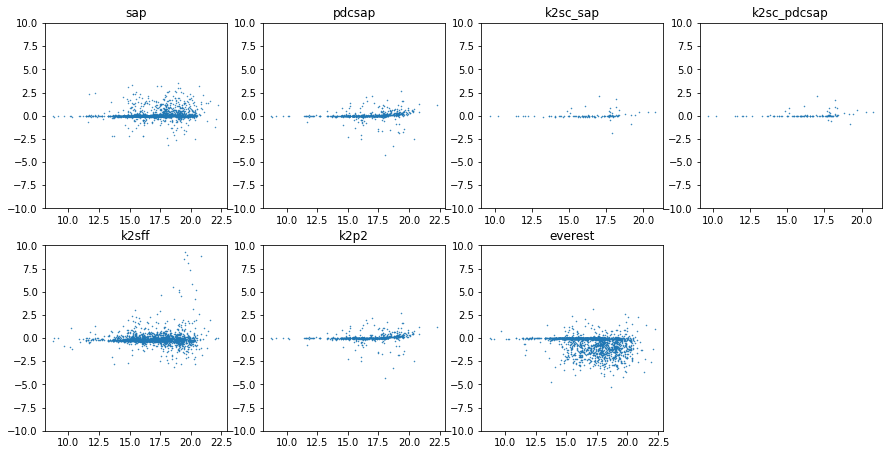

In [38]:
plt.figure(figsize=(15,7.5))
gs = gridspec.GridSpec(2, 4)
ax00 = plt.subplot(gs[0, 0])
ax01 = plt.subplot(gs[0, 1])
ax02 = plt.subplot(gs[0, 2])
ax10 = plt.subplot(gs[0, 3])
ax11 = plt.subplot(gs[1, 0])
ax12 = plt.subplot(gs[1, 1])
ax20 = plt.subplot(gs[1, 2])



ax00.scatter([each for index, each in enumerate(kpmaglist) if 
             hasattr(sap_massaap_maxpower_diff[index],'dtype')==True],
            
            [each for index, each in enumerate(sap_massaap_maxpower_diff) if
             hasattr(each,'dtype')==True], 
            s=0.2)
ax00.set_title('sap')
ax00.set_ylim([-10,10])
 
ax01.scatter([each for index, each in enumerate(kpmaglist) if 
             hasattr(pdcsap_massaap_maxpower_diff[index],'dtype')==True],
            
            [each for index, each in enumerate(pdcsap_massaap_maxpower_diff) if
             hasattr(each,'dtype')==True], 
            s=0.25)
ax01.set_title('pdcsap')
ax01.set_ylim([-10,10])


ax02.scatter([each for index, each in enumerate(kpmaglist) if 
             hasattr(k2sc_sap_massaap_maxpower_diff[index],'dtype')==True],
            
            [each for index, each in enumerate(k2sc_sap_massaap_maxpower_diff) if
             hasattr(each,'dtype')==True], 
            s=0.25)
ax02.set_title('k2sc_sap')
ax02.set_ylim([-10,10])


ax10.scatter([each for index, each in enumerate(kpmaglist) if 
             hasattr(k2sc_pdcsap_massaap_maxpower_diff[index],'dtype')==True],
            
            [each for index, each in enumerate(k2sc_pdcsap_massaap_maxpower_diff) if
             hasattr(each,'dtype')==True], 
            s=0.25)
ax10.set_title('k2sc_pdcsap')
ax10.set_ylim([-10,10])


ax11.scatter([each for index, each in enumerate(kpmaglist) if 
             hasattr(k2sff_massaap_maxpower_diff[index],'dtype')==True],
            
            [each for index, each in enumerate(k2sff_massaap_maxpower_diff) if
             hasattr(each,'dtype')==True], 
            s=0.25)
ax11.set_title('k2sff')
ax11.set_ylim([-10,10])


ax12.scatter([each for index, each in enumerate(kpmaglist) if 
             hasattr(k2p2_massaap_maxpower_diff[index],'dtype')==True],
            
            [each for index, each in enumerate(k2p2_massaap_maxpower_diff) if
             hasattr(each,'dtype')==True], 
            s=0.25)
ax12.set_title('k2p2')
ax12.set_ylim([-10,10])


ax20.scatter([each for index, each in enumerate(kpmaglist) if 
             hasattr(everest_massaap_maxpower_diff[index],'dtype')==True],
            
            [each for index, each in enumerate(everest_massaap_maxpower_diff) if
             hasattr(each,'dtype')==True],       
            s=0.25)
ax20.set_title('everest')
ax20.set_ylim([-10,10])


In [22]:
[each for index, each in enumerate(k2sc_pdcsap_massaap_maxpower_ratio) if hasattr(each,'dtype')==True]

NameError: name 'k2sc_pdcsap_massaap_maxpower_ratio' is not defined

In [23]:
k2sc_pdcsap_massaap_maxpower_ratio

NameError: name 'k2sc_pdcsap_massaap_maxpower_ratio' is not defined

In [24]:
import matplotlib.gridspec as gridspec


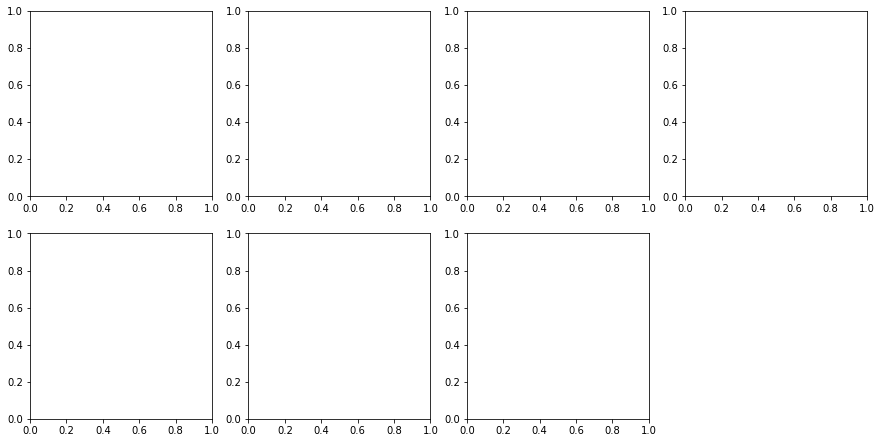

In [25]:
plt.figure(figsize=(15,7.5))
gs = gridspec.GridSpec(2, 4)
ax00 = plt.subplot(gs[0, 0])
ax01 = plt.subplot(gs[0, 1])
ax02 = plt.subplot(gs[0, 2])
ax10 = plt.subplot(gs[0, 3])
ax11 = plt.subplot(gs[1, 0])
ax12 = plt.subplot(gs[1, 1])
ax20 = plt.subplot(gs[1, 2])

In [ ]:
[each for index, each in enumerate(kpmaglist) if 
             (type(sap_massaap_maxpower_ratio[index])==float)]

In [ ]:
for index, each in enumerate(kpmaglist):
    print(np.dtype(sap_massaap_maxpower_ratio[index])=='float64')

In [ ]:
sap_massaap_maxpower_ratio

In [ ]:
plt.figure()
plt.scatter(kpmaglist,sap_massaap_maxpower_ratio)
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (type(sap_massaap_maxpower_ratio[index])==int)],
            
            [each for index, each in enumerate(sap_massaap_maxpower_ratio) if
             (type(kpmaglist[index])==int)])


plt.figure()
plt.scatter(kpmaglist,pdcsap_massaap_maxpower_ratio)
plt.figure()
plt.scatter(kpmaglist,k2sc_sap_massaap_maxpower_ratio)
plt.figure()
plt.scatter(kpmaglist,k2sc_pdcsap_massaap_maxpower_ratio)
plt.figure()
plt.scatter(kpmaglist,k2sff_massaap_maxpower_ratio)
plt.figure()
plt.scatter(kpmaglist,k2p2_massaap_maxpower_ratio)
plt.figure()
plt.scatter(kpmaglist,everest_massaap_maxpower_ratio)

In [ ]:
ourstar.k2sff_time

In [ ]:
ourstar.saptime

In [ ]:
ourstar.sapflux

In [ ]:
from astropy.stats import LombScargle

In [ ]:
!pwd

In [20]:
import sys
terminalpythonpath=['', '/home/szabopal/PycharmProjects/venv36/lib/python36.zip', '/home/szabopal/PycharmProjects/venv36/lib/python3.6', '/home/szabopal/PycharmProjects/venv36/lib/python3.6/lib-dynload', '/usr/lib/python3.6', '/home/szabopal/PycharmProjects/venv36/lib/python3.6/site-packages']
[sys.path.append(each) for each in terminalpythonpath]
import matplotlib.pyplot as plt

In [ ]:
frequency, power = LombScargle(ourstar.saptime, ourstar.sapflux).autopower()
#plt.plot(frequency, power)       
nyquist = len(ourstar.saptime)/(2*(max(ourstar.saptime)-min(ourstar.saptime)))
#plt.xlim([0,nyquist])
best_frequency = frequency[np.argmax(power[frequency<nyquist])]
print(best_frequency)
maxpower=np.max(power[frequency<nyquist])
print(maxpower)